<a href="https://colab.research.google.com/github/fariaslrc/science/blob/main/Matplotlib-Seaborn-Bivariadas-discreta-cont%C3%ADnua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("SINASC_RO_2019.csv")

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

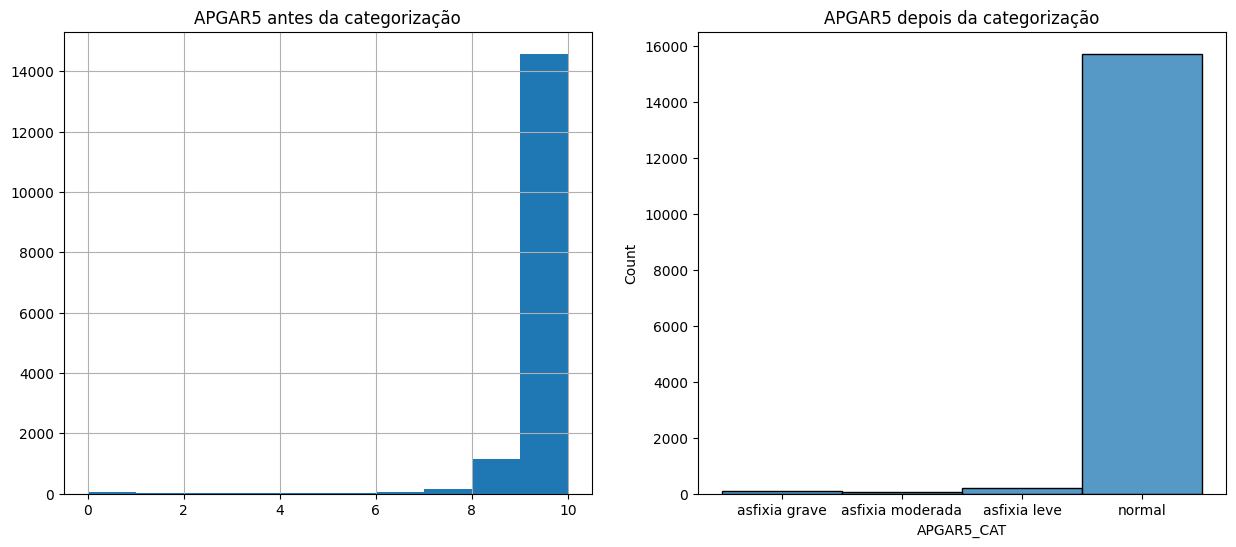

In [3]:
# Categorizar APGAR5
# df['APGAR5'].replace([0, 1, 2, 3], 'asfixia grave', inplace=True)
# df['APGAR5'].replace([4, 5], 'asfixia moderada', inplace=True)
# df['APGAR5'].replace([6, 7], 'asfixia leve', inplace=True)
# df['APGAR5'].replace([8, 9, 10], 'normal', inplace=True)

# Categorizar APGAR5 usando função lambda
df['APGAR5'].fillna(0, inplace=True)
df['APGAR5'] = df['APGAR5'].astype(int)
df['APGAR5_CAT'] = df['APGAR5'].apply(lambda x: 'asfixia grave' if x <= 3 else ('asfixia moderada' if x <= 5 else ('asfixia leve' if x <= 7 else 'normal')))

# definir tamanho da figura
plt.rc('figure', figsize=(15, 6))

# Gráfico antes da categorização
plt.subplot(1, 2, 1)
df['APGAR5'].hist()
plt.title('APGAR5 antes da categorização')

# Gráfico depois da categorização
plt.subplot(1, 2, 2)
## Definir a ordem desejada
ordem = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']
## Definir APGAR5_CAT como uma categoria com a ordem desejada
df['APGAR5_CAT'] = pd.Categorical(df['APGAR5_CAT'], categories=ordem, ordered=True)
## plotar gráfico
sns.histplot(data=df, x='APGAR5_CAT', bins=ordem)
plt.title('APGAR5 depois da categorização')
plt.show()

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

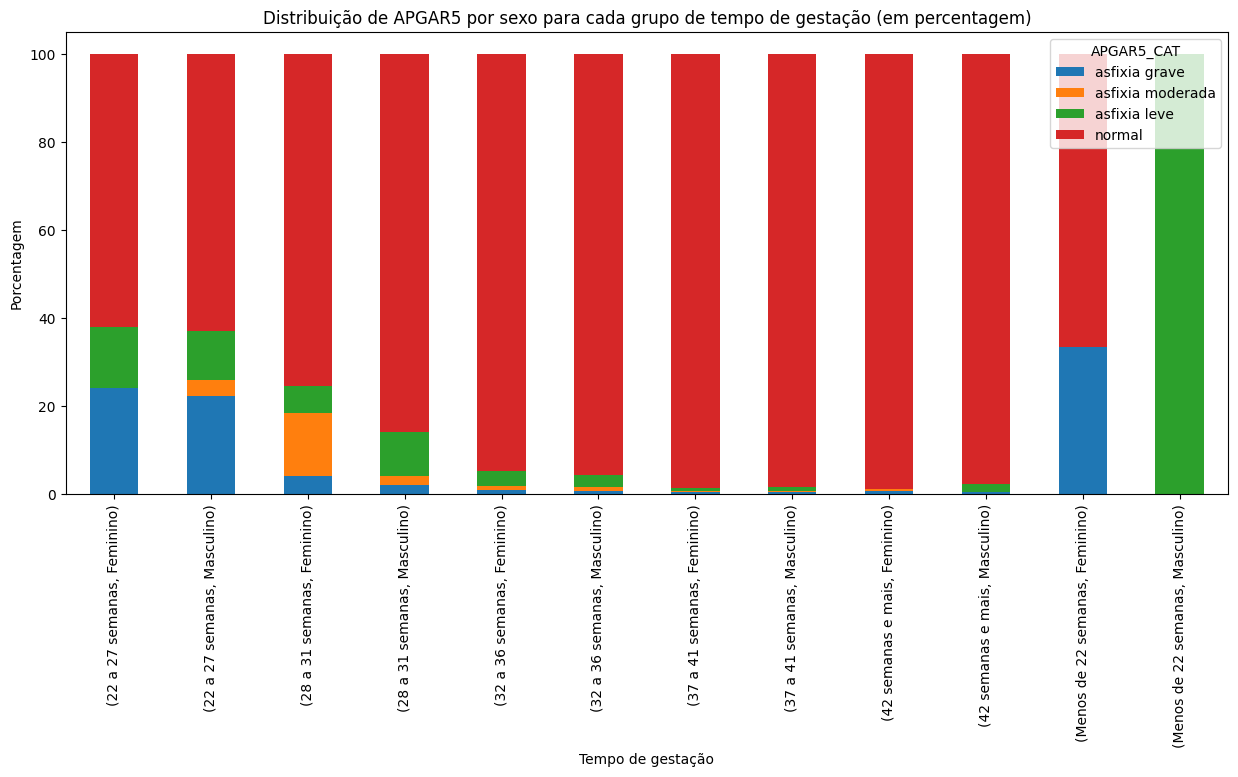

In [4]:
# Remover linhas em GESTACAO com valor igual a 0
df = df[df['GESTACAO'] != 0]

# Calcular a tabela de frequência
tabela_frequencia = df.groupby(['GESTACAO', 'SEXO', 'APGAR5_CAT']).size().unstack()

# Normalizar por linha para obter percentagens
tabela_percentagem = tabela_frequencia.div(tabela_frequencia.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras em percentagem
tabela_percentagem.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.xlabel('Tempo de gestação')
plt.ylabel('Porcentagem')
plt.title('Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (em percentagem)')
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
pd.crosstab(df['GESTACAO'], df['APGAR5_CAT'])

APGAR5_CAT,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,13,1,7,35
28 a 31 semanas,3,8,8,80
32 a 36 semanas,10,13,41,1318
37 a 41 semanas,61,18,120,13270
42 semanas e mais,2,1,4,397
Menos de 22 semanas,1,0,1,2


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
pd.crosstab(df['GESTACAO'], df['APGAR5_CAT'], normalize='index')

APGAR5_CAT,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,0.232143,0.017857,0.125000,0.625000
28 a 31 semanas,0.030303,0.080808,0.080808,0.808081
32 a 36 semanas,0.007236,0.009407,0.029667,0.953690
37 a 41 semanas,0.004529,0.001336,0.008909,0.985225
42 semanas e mais,0.004950,0.002475,0.009901,0.982673
Menos de 22 semanas,0.250000,0.000000,0.250000,0.500000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

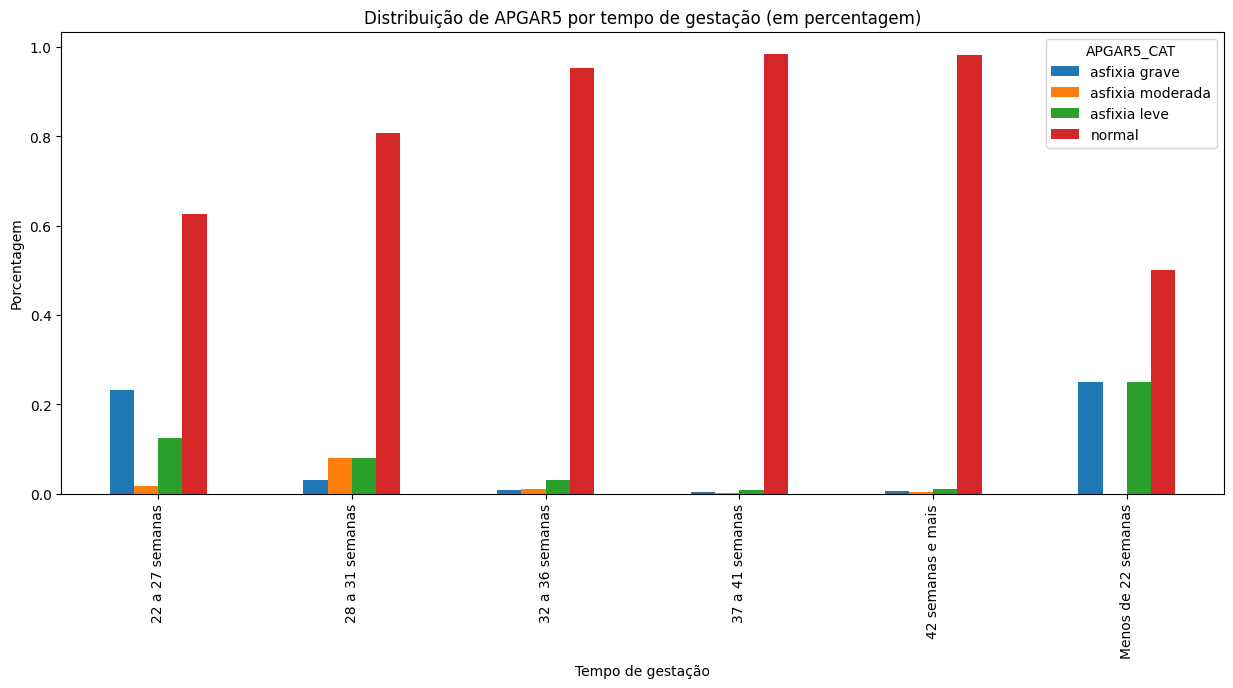

In [7]:
pd.crosstab(df['GESTACAO'], df['APGAR5_CAT'], normalize='index').plot(kind='bar', figsize=(15, 6))
plt.xlabel('Tempo de gestação')
plt.ylabel('Porcentagem')
plt.title('Distribuição de APGAR5 por tempo de gestação (em percentagem)')
plt.show()

# Conclusão
# O gráfico mostra que a maioria das gestações prematuras (menos de 37 semanas) resultam em bebês com APGAR5 normal. No entanto, há uma porcentagem maior de bebês que apresentam alguma forma de asfixia.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5_CAT', ylabel='PESO'>

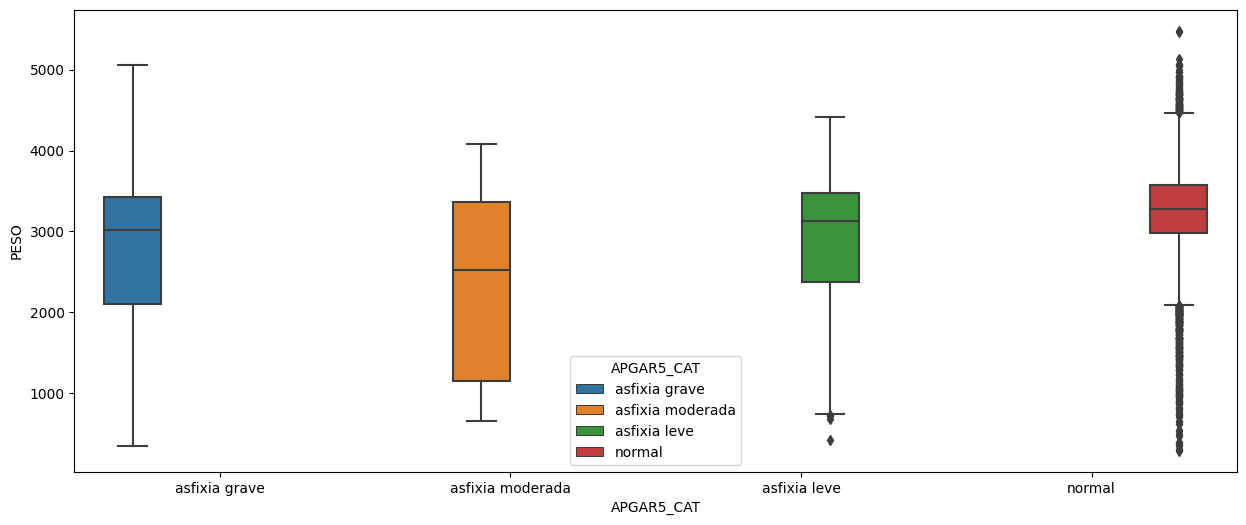

In [30]:
sns.boxplot(data = df, y="PESO", x="APGAR5_CAT", orient="v", hue='APGAR5_CAT')

Analisando o gráfico, podemos ver que:

**Asfixia grave**: Os bebês com asfixia grave têm o menor peso e a maior variação de peso.

**Asfixia moderada**: Os bebês com asfixia moderada têm um peso médio um pouco maior que os de asfixia grave e uma variação de peso semelhante.

**Asfixia leve**: Os bebês com asfixia leve têm um peso médio um pouco maior que os de asfixia moderada e uma variação de peso menor nos Q3 e Q1. Há alguns outliers que têm peso muito baixo.

**Normal**: Os bebês com APGAR5 normal têm a maior mediana de peso e a menor variação do peso. Há bastante outliers nessa categoria.

Portanto, podemos concluir que há uma relação positiva entre o APGAR5 e o peso do bebê, ou seja, quanto maior o APGAR5, maior o peso do bebê. Isso pode indicar que os bebês com maior vitalidade tendem a ter um melhor estado nutricional e de crescimento. No entanto, essa relação não é linear nem determinística, pois há outros fatores que podem influenciar o peso do bebê, como a idade gestacional, o sexo, a genética, a alimentação, entre outros.